In [1]:
import torch
import hiddenlayer as h1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.drop(["Serial No."], axis = 1, inplace = True)

In [6]:
# rename target variable
df = df.rename(index=str, columns={"Chance of Admit ": "Admit_Probability"})

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### EDA

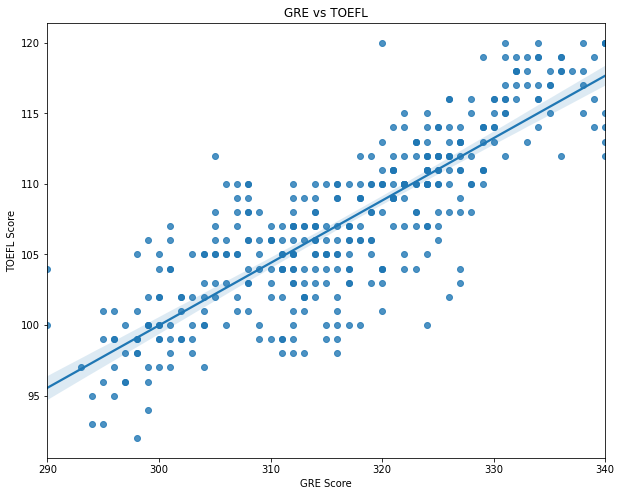

In [8]:
# GRE vs. TOEFL scores
plt.figure(figsize=(10,8))
fig = sns.regplot(x = "GRE Score", y = "TOEFL Score", data=df)
plt.title("GRE vs TOEFL")
plt.show()

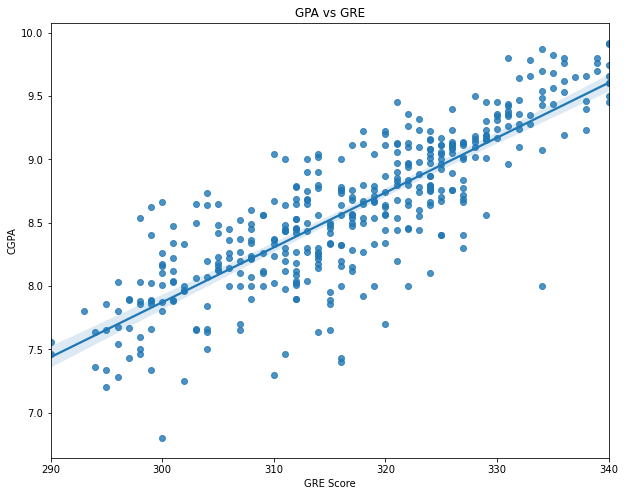

In [9]:
# GRE vs GPA
plt.figure(figsize=(10,8))
fig = sns.regplot(x = "GRE Score", y = "CGPA", data=df)
plt.title("GPA vs GRE")
plt.show()

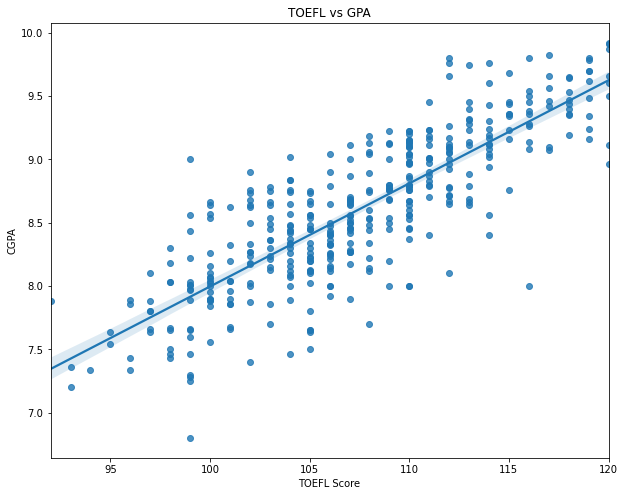

In [10]:
# GPA vs TOEFL
plt.figure(figsize=(10,8))
fig = sns.regplot(x = "TOEFL Score", y = "CGPA", data=df)
plt.title("TOEFL vs GPA")
plt.show()

Text(0, 0.5, 'GPA')

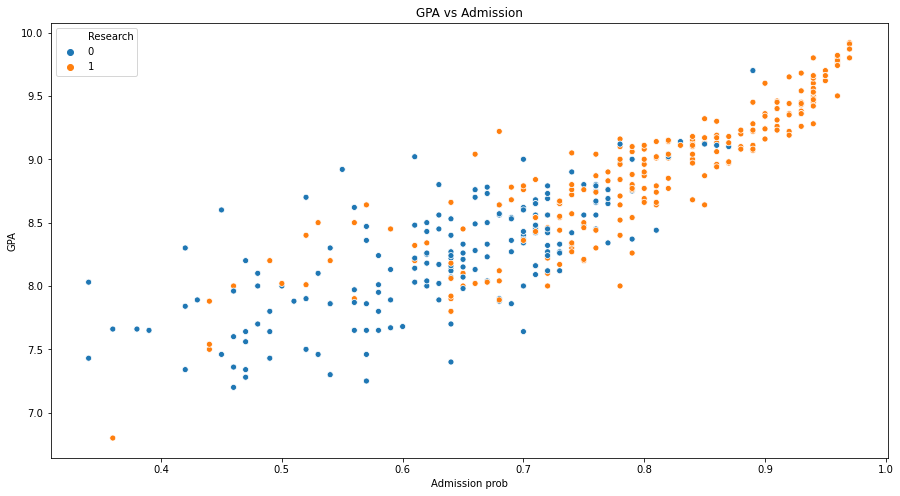

In [11]:
# Admission prob vs GPA if the student did or did not research 
plt.figure(figsize=(15,8))
fig = sns.scatterplot(x="Admit_Probability", y="CGPA", data=df, hue= "Research")
plt.title( "GPA vs Admission")
plt.xlabel("Admission prob")
plt.ylabel("GPA")

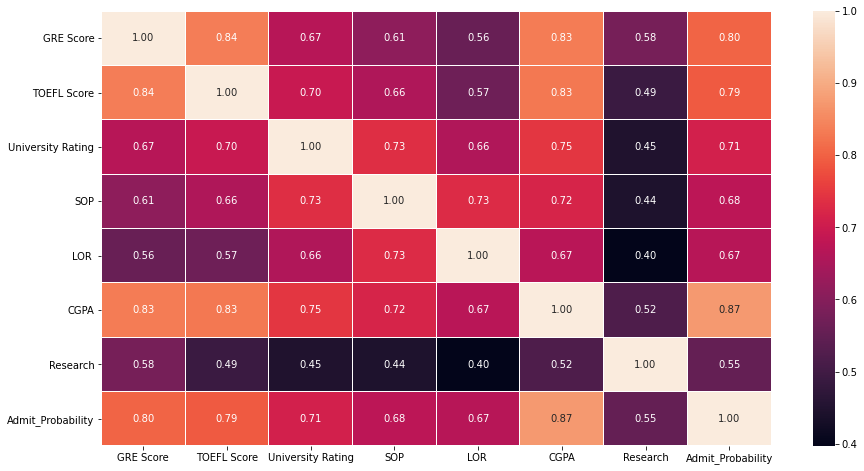

In [12]:
# correlation of all pairs of data in df
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= ".2f")
plt.show()

#### Model building

In [13]:
from sklearn import preprocessing

In [14]:
# standardize features to have 0 mean and 1 unit variance  -> (x - mean)/SD
df[df.columns] = preprocessing.scale(df[df.columns])

In [15]:
df.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
150,1.500310,1.087114,0.798829,0.596653,0.610127,1.395425,0.909112,1.443857
342,-0.768590,-0.232599,-0.076600,-0.397769,-0.504260,-0.602657,-1.099975,-1.013473
35,0.278595,0.427257,1.674257,1.591075,1.724515,1.009241,0.909112,1.092810
91,-1.553979,-1.717277,-0.076600,1.591075,0.052933,-1.576512,-1.099975,-2.417663
66,0.889453,1.087114,-0.076600,-0.397769,-0.504260,0.707010,-1.099975,-0.802845
371,0.627656,0.427257,-0.076600,0.099442,-0.504260,1.042822,0.909112,1.163020
87,0.016799,-0.067635,-0.952029,0.099442,-0.504260,-0.535494,-1.099975,-0.451798
135,-0.244998,0.262293,0.798829,0.099442,0.610127,0.287245,0.909112,0.671553
80,-0.419528,-0.397564,-0.076600,-1.392191,-0.504260,-0.972050,0.909112,-1.575149
59,-0.506794,-0.562528,-0.952029,-1.392191,-1.618648,-0.501913,-1.099975,-2.136825


In [16]:
# drop univ rating and research
df.drop(columns = ["University Rating", "Research"], axis = 1, inplace = True)
X = df.drop(["Admit_Probability"], axis = 1)

In [17]:
X.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [18]:
y = df[["Admit_Probability"]]

In [19]:
y.head()

,Admit_Probability
0,1.373648
1,0.250297
2,-0.030541
3,0.531135
4,-0.522007


In [20]:
target = y.copy()

In [21]:
# convert probability of admission into buckets
target.replace(to_replace = y[y >= 0.8], value = int(2), inplace= True)
target.replace(to_replace = y[y >= 0.6], value = int(1), inplace= True)
target.replace(to_replace = y[y < 0.6], value = int(0), inplace= True)

In [22]:
y = target

In [23]:
y.head()

,Admit_Probability
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0


In [24]:
y["Admit_Probability"].unique()

array([2., 0., 1.])

In [25]:
# Train & Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [26]:
# turn arrays into tensors
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(X_test.values).float() 

In [27]:
Xtrain.shape # 5 is the input size of the NN

torch.Size([320, 5])

In [28]:
# Shape of numpy arrays of y
y_train.shape, y_test.shape  

((320, 1), (80, 1))

In [29]:
# transform y_train and y_test into one dimentional vector
Ytrain = torch.from_numpy(y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()  

In [30]:
Ytest.shape

torch.Size([80])

In [31]:
# import NN libraries to build our own NN
import torch.nn as nn
import torch.nn.functional as F 

In [32]:
input_size = Xtrain.shape[1]
output_size = len(y["Admit_Probability"].unique())

In [33]:
print(input_size) 
print(output_size)

5
3


In [34]:
# create a class called Net - inherits form nn.class
class Net(nn.Module):
    def __init__(self, hidden_size, activation_fn = "relu", apply_dropout = False): # base intialization with input arguments
        super(Net, self).__init__()
        
        # create the 3 linear layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        # initialize size of hidden layers and activation function
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        # by default, dropout is false, else dropout will be of 0.2
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)
          
        # the forward function allows me to specify very thoroughly how we want the layers to apply to our input x
    def forward(self, x): # input of forawd function is x - x is one value of one feature.
        
        # depending on what user specifies, apply that activation function
        activation_fn = None
        if self.activation_fn == "sigmoid":
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == "tanh":
            activation_fn = F.torch.tanh
        elif self.activation_fn == "relu":
            activation_fn = F.torch.relu   
            
    
        x = activation_fn(self.fc1(x)) # pass input x thru first fully connected linear layer and apply acivation function
        x = activation_fn(self.fc2(x))# pass output of 1st layer thru second fully connected linear layer and apply acivation function again
        # these 2 are the first 2 linear layers followed by an activation function
        
        
        if self.dropout != None:
            x = self.dropout(x)


        x = self.fc3(x) # x passes into the 3rd and last linear layer
        return F.log_softmax(x, dim = -1) # output of 3rd layer passes into a log softmax function

In [35]:
import torch.optim as optim

In [36]:
# define function to train and evaluate my model
def train_and_evaluate_model(model, learn_rate = 0.001):
    epoch_data = [] # model loss and accuracy on test data of each epoch will be stored in this list
    epochs = 1001
    
    optimizer = optim.Adam(model.parameters(), lr = learn_rate) 
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0 # set default accuracy to be 0
    for epoch in range(1, epochs):
        
        optimizer.zero_grad()
        
        model.train() 
        Ypred = model(Xtrain) # get the predictions of the TRAIN model
        
        loss = loss_fn(Ypred, Ytrain)
        loss.backward() # calcuates gradient with respect to loss
        
        optimizer.step() # updates model parameters in prep for next forward pass
        
        model.eval() # switch to evaluate mode
        
        Ypred_test = model(Xtest) # get predictions
        loss_test = loss_fn(Ypred_test, Ytest) # loss
        
        _, pred = Ypred_test.data.max(1) # get prediction by taking the category with max prob score
        
        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size 
        
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy]) 
        
        
        if epoch % 100 == 0: # print info every 100 epochs
            print("epoch - %d (%d%%) train loss - %.2f test loss - %.2f test accuracy - %.4f" \
                 % (epoch, epoch/150*10, loss.data.item(),
                   loss_test.data.item(), test_accuracy))
            
    return {"model" : model,
           "epoch_data" : epoch_data,
           "num_epochs" : epochs,
           "optimizer" : optimizer,
           "loss_fn" : loss_fn,
           "test_accuracy" : test_accuracy,
           "_, pred" : Ypred_test.data.max(1),
            "actual_test_label" : Ytest,
           
           } 

In [37]:
# build NN

net = Net(hidden_size=3, activation_fn="sigmoid", apply_dropout=False)
net # train model with 3 hidden layers

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [38]:
# invoke train and eval function created before
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.05 test loss - 1.04 test accuracy - 0.7500
epoch - 200 (13%) train loss - 0.90 test loss - 0.87 test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.81 test loss - 0.76 test accuracy - 0.7500
epoch - 400 (26%) train loss - 0.75 test loss - 0.69 test accuracy - 0.7500
epoch - 500 (33%) train loss - 0.70 test loss - 0.64 test accuracy - 0.7500
epoch - 600 (40%) train loss - 0.66 test loss - 0.59 test accuracy - 0.7500
epoch - 700 (46%) train loss - 0.62 test loss - 0.55 test accuracy - 0.7500
epoch - 800 (53%) train loss - 0.58 test loss - 0.51 test accuracy - 0.7500
epoch - 900 (60%) train loss - 0.54 test loss - 0.47 test accuracy - 0.7500
epoch - 1000 (66%) train loss - 0.51 test loss - 0.44 test accuracy - 0.7500


In [39]:
# use sigmoid activation and dropout
net = Net(hidden_size=3, activation_fn="sigmoid", apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [40]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.09 test loss - 1.08 test accuracy - 0.0750
epoch - 200 (13%) train loss - 0.96 test loss - 0.93 test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.88 test loss - 0.82 test accuracy - 0.7500
epoch - 400 (26%) train loss - 0.81 test loss - 0.75 test accuracy - 0.7500
epoch - 500 (33%) train loss - 0.77 test loss - 0.69 test accuracy - 0.7500
epoch - 600 (40%) train loss - 0.72 test loss - 0.64 test accuracy - 0.7500
epoch - 700 (46%) train loss - 0.69 test loss - 0.60 test accuracy - 0.7500
epoch - 800 (53%) train loss - 0.67 test loss - 0.57 test accuracy - 0.7500
epoch - 900 (60%) train loss - 0.64 test loss - 0.53 test accuracy - 0.7500
epoch - 1000 (66%) train loss - 0.61 test loss - 0.50 test accuracy - 0.7500


In [41]:
# try with 50 hidden neurons and tanh
net = Net(hidden_size=50, activation_fn="sigmoid", apply_dropout=False) 
net 

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [42]:
result_50_sigmoid = train_and_evaluate_model(net) # best accuracy of 93.75%

epoch - 100 (6%) train loss - 0.53 test loss - 0.47 test accuracy - 0.8000
epoch - 200 (13%) train loss - 0.32 test loss - 0.27 test accuracy - 0.9250
epoch - 300 (20%) train loss - 0.29 test loss - 0.25 test accuracy - 0.9250
epoch - 400 (26%) train loss - 0.27 test loss - 0.25 test accuracy - 0.9250
epoch - 500 (33%) train loss - 0.26 test loss - 0.25 test accuracy - 0.9375
epoch - 600 (40%) train loss - 0.26 test loss - 0.26 test accuracy - 0.9250
epoch - 700 (46%) train loss - 0.25 test loss - 0.26 test accuracy - 0.9375
epoch - 800 (53%) train loss - 0.25 test loss - 0.27 test accuracy - 0.9375
epoch - 900 (60%) train loss - 0.25 test loss - 0.27 test accuracy - 0.9375
epoch - 1000 (66%) train loss - 0.25 test loss - 0.27 test accuracy - 0.9375


In [43]:
# try with 1000 neurons
net = Net(hidden_size=1000, activation_fn="tanh", apply_dropout=False) 
net 

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [44]:
result_1000_sigmoid = train_and_evaluate_model(net) 

epoch - 100 (6%) train loss - 0.20 test loss - 0.32 test accuracy - 0.9000
epoch - 200 (13%) train loss - 0.08 test loss - 0.42 test accuracy - 0.8625
epoch - 300 (20%) train loss - 0.02 test loss - 0.52 test accuracy - 0.8750
epoch - 400 (26%) train loss - 0.01 test loss - 0.61 test accuracy - 0.8625
epoch - 500 (33%) train loss - 0.00 test loss - 0.66 test accuracy - 0.8625
epoch - 600 (40%) train loss - 0.00 test loss - 0.71 test accuracy - 0.8625
epoch - 700 (46%) train loss - 0.00 test loss - 0.74 test accuracy - 0.8625
epoch - 800 (53%) train loss - 0.00 test loss - 0.76 test accuracy - 0.8625
epoch - 900 (60%) train loss - 0.00 test loss - 0.78 test accuracy - 0.8625
epoch - 1000 (66%) train loss - 0.00 test loss - 0.80 test accuracy - 0.8750


In [45]:
# take best model
best_result = result_50_sigmoid

In [46]:
best_result

{'model': Net(
   (fc1): Linear(in_features=5, out_features=50, bias=True)
   (fc2): Linear(in_features=50, out_features=50, bias=True)
   (fc3): Linear(in_features=50, out_features=3, bias=True)
 ),
 'epoch_data': [[1, 1.0215113162994385, 0.9835178256034851, 0.75],
  [2, 0.9957298040390015, 0.9550809860229492, 0.75],
  [3, 0.9713581204414368, 0.9281136393547058, 0.75],
  [4, 0.9484440088272095, 0.9026614427566528, 0.75],
  [5, 0.927021324634552, 0.8787568211555481, 0.75],
  [6, 0.9071133732795715, 0.8564189076423645, 0.75],
  [7, 0.8887286186218262, 0.8356531262397766, 0.75],
  [8, 0.8718622326850891, 0.8164508938789368, 0.75],
  [9, 0.8564931154251099, 0.7987877130508423, 0.75],
  [10, 0.8425846099853516, 0.7826250195503235, 0.75],
  [11, 0.8300842046737671, 0.7679082155227661, 0.75],
  [12, 0.818924069404602, 0.7545688152313232, 0.75],
  [13, 0.8090217709541321, 0.7425255179405212, 0.75],
  [14, 0.8002824783325195, 0.7316867113113403, 0.75],
  [15, 0.7926010489463806, 0.721952378749

In [47]:
df_epochs_data = pd.DataFrame(best_result["epoch_data"],
                             columns = ["epoch", "train_loss", "test_loss", "accuracy"])

In [48]:
df_epochs_data.sample(10)

,epoch,train_loss,test_loss,accuracy
469,470,0.267142,0.248879,0.9375
909,910,0.247389,0.269848,0.9375
540,541,0.261079,0.252287,0.9375
258,259,0.294470,0.254594,0.9250
880,881,0.247831,0.269216,0.9375
710,711,0.251679,0.262639,0.9375
187,188,0.325450,0.279258,0.9250
7,8,0.871862,0.816451,0.7500
651,652,0.254083,0.259151,0.9250
282,283,0.289434,0.251420,0.9250


In [49]:
import matplotlib.pyplot as plt

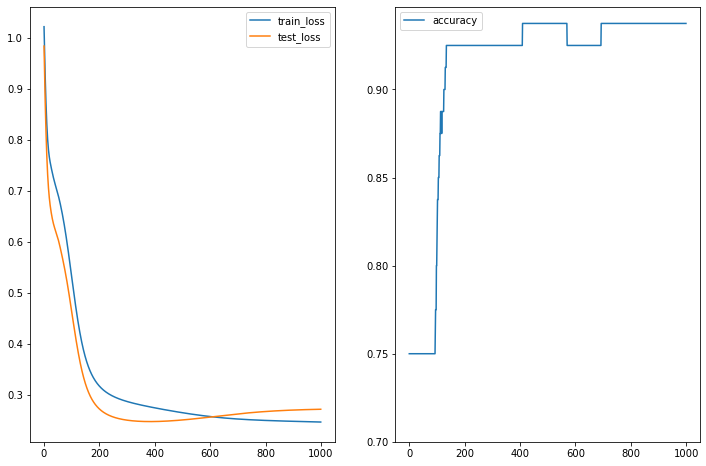

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.7)
plt.show()

It seems like the model starts overfitting at around 600 epochs - train loss keps decreasing but test loss increases